In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris = pd.read_excel(r"C:\Users\Admin\Downloads\iris (1)(1).xls")

In [7]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###  Data Analysis

In [8]:
iris.shape

(150, 5)

In [9]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

### Handling Null values

In [11]:
# Checking for null values
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

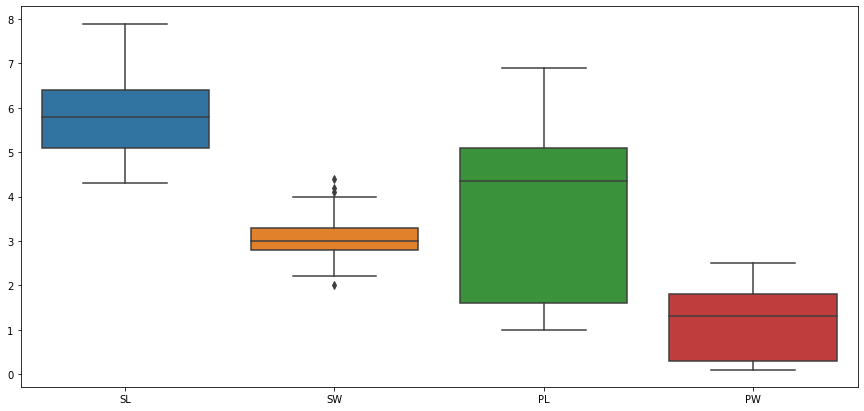

In [12]:
#Checking for ouliers before select a suitable method for filling NaN
plt.figure(figsize=(15,7))
sns.boxplot(data=iris)

In [13]:
#Replacing using Median

for i in ['SL', 'SW', 'PL']:
    iris[i]=iris[i].fillna(iris[i].median())
    print(iris[i].median())#Just to see what are the values we used to fill NaN

5.8
3.0
4.35


In [14]:
#Replacing using Interpolate

#for i in ['SL', 'SW', 'PL']:
   # iris[i]=iris[i].fillna(iris[i].interpolate())
   # print(iris[i].median())#Just to see what are the values we used to fill NaN

In [15]:
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Handling Outliers

<AxesSubplot:>

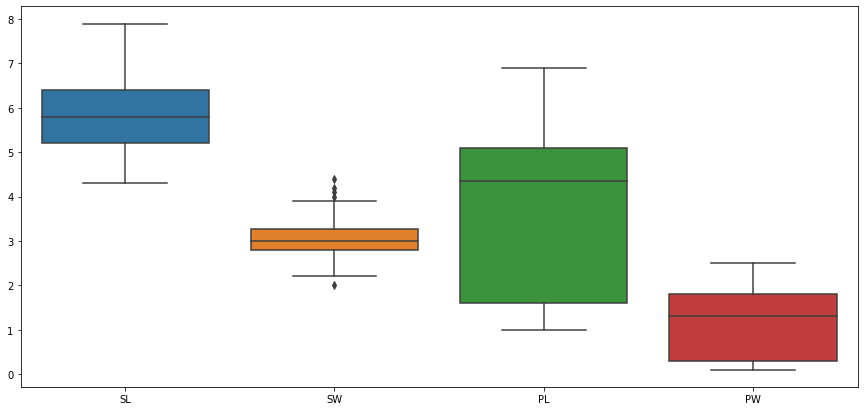

In [16]:
plt.figure(figsize=(15,7))
sns.boxplot(data=iris)

In [17]:
Q1=iris.SW.quantile(0.25,interpolation='midpoint')
Q3=iris.SW.quantile(0.75,interpolation='midpoint')
Q1,Q3
        

(2.8, 3.25)

In [18]:
IQR=Q3-Q1
IQR

0.4500000000000002

In [19]:
LL=Q1-1.5*IQR #LL - Lower Limit
UL=Q3+1.5*IQR #UL - Upper Limit
print(LL,UL)

2.1249999999999996 3.9250000000000003


In [20]:
outliers=iris[(iris.SW<LL) | (iris.SW>UL)] #These are the outliers in the SW column
outliers

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [21]:
#Capping and Flooring method with IQR
iris['SW']= np.where(iris['SW']>UL,UL,np.where(iris['SW']<LL,LL,iris['SW']))

In [22]:
iris[(iris.SW<LL) | (iris.SW>UL)] #As we can see there are no more oulliers

,SL,SW,PL,PW,Classification


<AxesSubplot:>

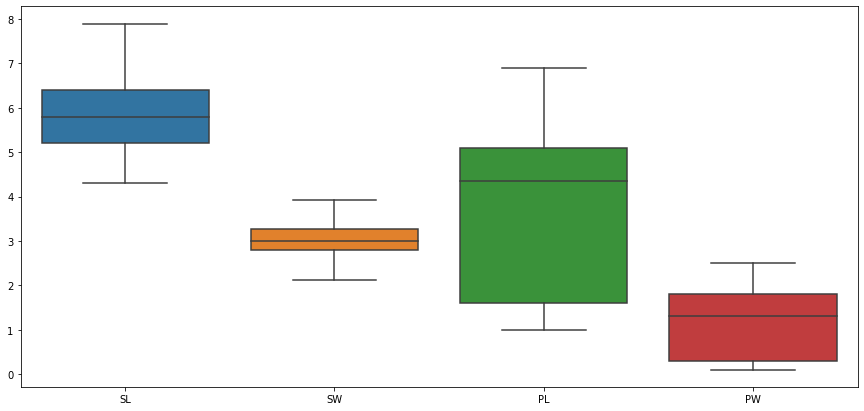

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(data=iris)

In [24]:
iris.shape

(150, 5)


### Checking for Duplicated Values



In [25]:
iris.duplicated().sum()



3

In [26]:


iris[iris.duplicated()]



,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [27]:
iris.drop([34,37,142],inplace=True)

In [28]:
iris.duplicated().sum()

0

### Model Building

In [29]:
#First we can split our iris datset to X and y
X = iris.drop(['Classification'],axis=1)
y = iris.Classification

In [30]:
#Now we can create train and test varaibles

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=34)

In [31]:
print(X_train.shape)
print(X_test.shape)

(117, 4)
(30, 4)


### 1.Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(max_iter=200)
logic.fit(X_train,y_train)
y_pred = logic.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.9666666666666667
0.9666240953597277
[[13  1  0]
 [ 0 14  0]
 [ 0  0  2]]


### 2.KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_pred,y_test)
    accuracy.append(acc)

In [35]:
accuracy

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

<AxesSubplot:>

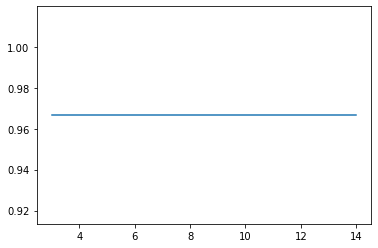

In [36]:
sns.lineplot(x=neighbors,y=accuracy,)

In [37]:
classifier = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [38]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.9666666666666667
0.9666240953597277
[[13  1  0]
 [ 0 14  0]
 [ 0  0  2]]


### 3.SVM

In [39]:
from sklearn.svm import SVC
svm = SVC(C=1,kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

0.9666666666666667
0.9666240953597277
[[13  1  0]
 [ 0 14  0]
 [ 0  0  2]]


### 4.Decison Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [42]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  2]]


Text(87.0, 0.5, 'Predcited Value')

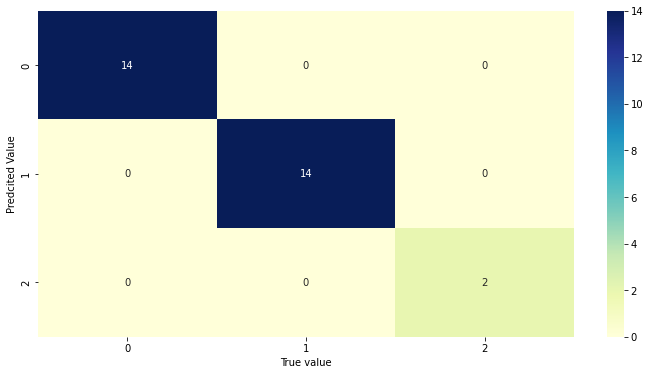

In [43]:
cm = (confusion_matrix(y_test,y_pred))
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel("True value")
plt.ylabel("Predcited Value")

### 5.Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

In [45]:
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(confusion_matrix(y_test,y_pred))

1.0
1.0
[[14  0  0]
 [ 0 14  0]
 [ 0  0  2]]


Text(87.0, 0.5, 'Predcited Value')

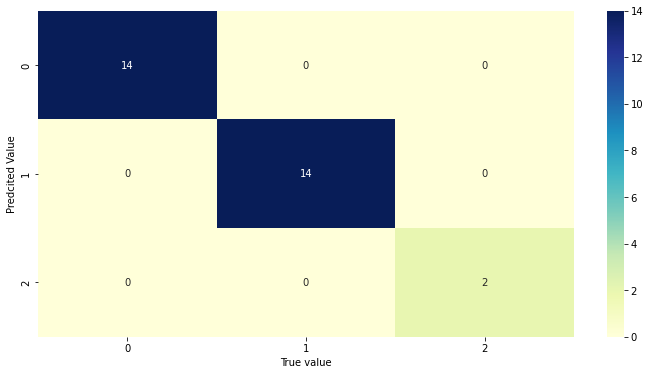

In [46]:
cm = (confusion_matrix(y_test,y_pred))
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu")
plt.xlabel("True value")
plt.ylabel("Predcited Value")

Both the Decision Tree model and Random Forest Classifier gives 100 percentage accuracy and f1 score 